<a href="https://colab.research.google.com/github/Preet28/Fake-Review-Detection/blob/main/updated_perf_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

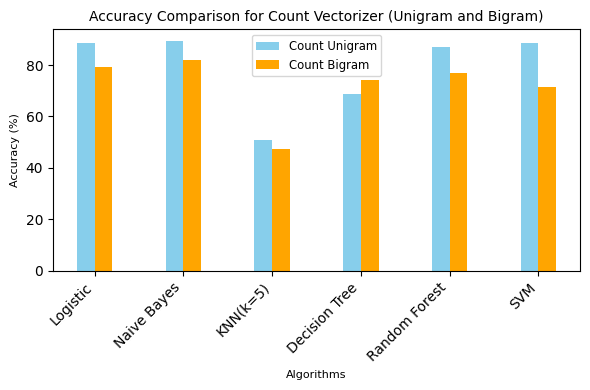

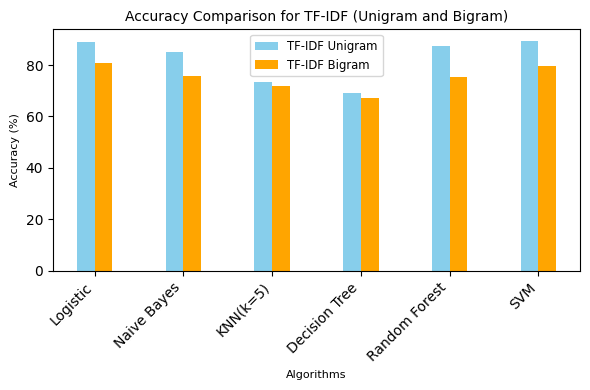

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithms and their accuracy values
algorithms = ['Logistic', 'Naive Bayes', 'KNN(k=5)', 'Decision Tree', 'Random Forest', 'SVM']
count_unigram = [88.4, 89.4, 51, 68.8, 86.9, 88.4]
count_bigram = [79.3, 81.9, 47.5, 74.3, 76.9, 71.5]
tfidf_unigram = [89.1, 85, 73.4, 69.1, 87.2, 89.4]
tfidf_bigram = [80.6, 75.6, 71.9, 67.2, 75.3, 79.7]

# Bar width
bar_width = 0.2
index = np.arange(len(algorithms))

# Create separate bar plots for Count Vectorizer and TF-IDF
plt.figure(figsize=(6, 4))

# Count Vectorizer (Unigram)
plt.bar(index, count_unigram, bar_width, label='Count Unigram', color='skyblue')
# Count Vectorizer (Bigram)
plt.bar(index + bar_width, count_bigram, bar_width, label='Count Bigram', color='orange')

# Labeling and customization for Count Vectorizer plot
plt.xlabel('Algorithms', fontsize=8)
plt.ylabel('Accuracy (%)', fontsize=8)
plt.title('Accuracy Comparison for Count Vectorizer (Unigram and Bigram)', fontsize=10)
plt.xticks(index + bar_width/2, algorithms, rotation=45, ha='right')
plt.legend(fontsize='small')
plt.tight_layout()

# Show the Count Vectorizer plot
plt.show()

# Create a new figure for TF-IDF plots
plt.figure(figsize=(6, 4))

# TF-IDF (Unigram)
plt.bar(index, tfidf_unigram, bar_width, label='TF-IDF Unigram', color='skyblue')
# TF-IDF (Bigram)
plt.bar(index + bar_width, tfidf_bigram, bar_width, label='TF-IDF Bigram', color='orange')

# Labeling and customization for TF-IDF plot
plt.xlabel('Algorithms', fontsize=8)
plt.ylabel('Accuracy (%)', fontsize=8)
plt.title('Accuracy Comparison for TF-IDF (Unigram and Bigram)', fontsize=10)
plt.xticks(index + bar_width/2, algorithms, rotation=45, ha='right')
plt.legend(fontsize='small')
plt.tight_layout()

# Show the TF-IDF plot
plt.show()

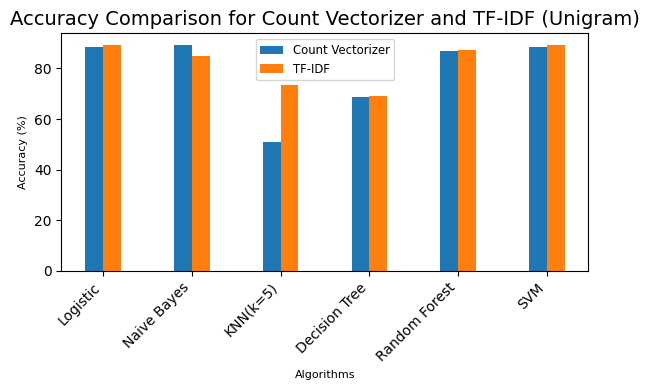

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithms and their accuracy values for Count Vectorizer (Unigram) and TF-IDF (Unigram)
algorithms = ['Logistic', 'Naive Bayes', 'KNN(k=5)', 'Decision Tree', 'Random Forest', 'SVM']
count_unigram = [88.4, 89.4, 51, 68.8, 86.9, 88.4]
tfidf_unigram = [89.1, 85, 73.4, 69.1, 87.2, 89.4]

# Bar width and figure size
bar_width = 0.2
index = np.arange(len(algorithms))

# Define colors for Count Vectorizer and TF-IDF
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create a combined bar plot for Count Vectorizer (Unigram) and TF-IDF (Unigram)
plt.figure(figsize=(6, 4))
plt.bar(index, count_unigram, bar_width, label='Count Vectorizer', color=colors[0])
plt.bar(index + bar_width, tfidf_unigram, bar_width, label='TF-IDF', color=colors[1])

# Labeling and customization for the plot
plt.xlabel('Algorithms', fontsize=8)
plt.ylabel('Accuracy (%)', fontsize=8)
plt.title('Accuracy Comparison for Count Vectorizer and TF-IDF (Unigram)', fontsize=14)
plt.xticks(index + bar_width/2, algorithms, rotation=45, ha='right')
plt.legend(fontsize='small')
plt.tight_layout()

# Save the plot as an image
plt.savefig('count_vs_tfidf_unigram.png', dpi=300, bbox_inches='tight')
plt.show()


In [1]:
!git clone https://github.com/Preet28/Fake-Review-Detection.git

Cloning into 'Fake-Review-Detection'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 71 (delta 36), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (71/71), 1022.60 KiB | 1.84 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [2]:
import pandas as pd
df = pd.read_csv('/content/Fake-Review-Detection/deceptive-opinion.csv')

In [3]:
df.head(5)

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [ ]:
df.describe()

,deceptive,hotel,polarity,source,text
count,1600,1600,1600,1600,1600
unique,2,20,2,3,1596
top,truthful,conrad,positive,MTurk,The Omni was chosen for it's location whichwor...
freq,800,80,800,800,2


In [ ]:
type('text')

str

In [ ]:
sum = 0
for i in df['text']:
  sum = sum + len(i)

print(sum/1600)

806.39125


In [4]:
from textblob import TextBlob
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import pos_tag,pos_tag_sents
import regex as re
import operator
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [5]:
df = df.drop(['hotel', 'source', 'polarity'], axis=1)
df.head(2)

,deceptive,text
0,truthful,We stayed for a one night getaway with family ...
1,truthful,Triple A rate with upgrade to view room was le...


In [6]:
df['text'] = df['text'].map(lambda x: x.lower())
df['text'].head(3)

0    we stayed for a one night getaway with family ...
1    triple a rate with upgrade to view room was le...
2    this comes a little late as i'm finally catchi...
Name: text, dtype: object

In [7]:
df.head(4)

,deceptive,text
0,truthful,we stayed for a one night getaway with family ...
1,truthful,triple a rate with upgrade to view room was le...
2,truthful,this comes a little late as i'm finally catchi...
3,truthful,the omni chicago really delivers on all fronts...


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag,pos_tag_sents
nltk.download('stopwords')

stop = stopwords.words('english')
df['review_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df

,deceptive,text,review_without_stopwords
0,truthful,we stayed for a one night getaway with family ...,stayed one night getaway family thursday. trip...
1,truthful,triple a rate with upgrade to view room was le...,triple rate upgrade view room less $200 also i...
2,truthful,this comes a little late as i'm finally catchi...,comes little late i'm finally catching reviews...
3,truthful,the omni chicago really delivers on all fronts...,"omni chicago really delivers fronts, spaciousn..."
4,truthful,i asked for a high floor away from the elevato...,asked high floor away elevator got. room pleas...
...,...,...,...
1595,deceptive,problems started when i booked the intercontin...,problems started booked intercontinental chica...
1596,deceptive,the amalfi hotel has a beautiful website and i...,amalfi hotel beautiful website interior decora...
1597,deceptive,the intercontinental chicago magnificent mile ...,intercontinental chicago magnificent mile outs...
1598,deceptive,"the palmer house hilton, while it looks good i...","palmer house hilton, looks good pictures, outs..."


In [10]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [11]:
def pos(review_without_stopwords):
    return TextBlob(review_without_stopwords).tags

os = df.review_without_stopwords.apply(pos)
os1 = pd.DataFrame(os)

In [12]:
os1

,review_without_stopwords
0,"[(stayed, JJ), (one, CD), (night, NN), (getawa..."
1,"[(triple, JJ), (rate, NN), (upgrade, JJ), (vie..."
2,"[(comes, VBZ), (little, JJ), (late, JJ), (i, N..."
3,"[(omni, NNS), (chicago, VBP), (really, RB), (d..."
4,"[(asked, VBN), (high, JJ), (floor, NN), (away,..."
...,...
1595,"[(problems, NNS), (started, VBD), (booked, VBD..."
1596,"[(amalfi, JJ), (hotel, NN), (beautiful, JJ), (..."
1597,"[(intercontinental, JJ), (chicago, NN), (magni..."
1598,"[(palmer, NN), (house, NN), (hilton, NN), (loo..."


In [13]:
os1['pos'] = os1['review_without_stopwords'].map(lambda x:" ".join(["".join(x) for x in x ]) )

In [14]:
df = pd.merge(df, os1, right_index=True, left_index = True)
df.head()

,deceptive,text,review_without_stopwords_x,review_without_stopwords_y,pos
0,truthful,we stayed for a one night getaway with family ...,stayed one night getaway family thursday. trip...,"[(stayed, JJ), (one, CD), (night, NN), (getawa...",stayedJJ oneCD nightNN getawayNN familyNN thur...
1,truthful,triple a rate with upgrade to view room was le...,triple rate upgrade view room less $200 also i...,"[(triple, JJ), (rate, NN), (upgrade, JJ), (vie...",tripleJJ rateNN upgradeJJ viewNN roomNN lessJJ...
2,truthful,this comes a little late as i'm finally catchi...,comes little late i'm finally catching reviews...,"[(comes, VBZ), (little, JJ), (late, JJ), (i, N...",comesVBZ littleJJ lateJJ iNN 'mVBP finallyRB c...
3,truthful,the omni chicago really delivers on all fronts...,"omni chicago really delivers fronts, spaciousn...","[(omni, NNS), (chicago, VBP), (really, RB), (d...",omniNNS chicagoVBP reallyRB deliversNNS fronts...
4,truthful,i asked for a high floor away from the elevato...,asked high floor away elevator got. room pleas...,"[(asked, VBN), (high, JJ), (floor, NN), (away,...",askedVBN highJJ floorNN awayRB elevatorJJ gotV...


In [15]:
review_train, review_test, label_train, label_test = train_test_split(df['pos'], df['deceptive'], test_size=0.2,random_state=13)

In [16]:
tf_vect = TfidfVectorizer(lowercase = True, use_idf=True, smooth_idf=True, sublinear_tf=False)

X_train_tf = tf_vect.fit_transform(review_train)
X_test_tf = tf_vect.transform(review_test)

In [17]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

svc_param_selection(X_train_tf,label_train,5)

{'C': 1, 'gamma': 0.001}

In [18]:
clf = svm.SVC(C=10,gamma=0.001,kernel='linear')
clf.fit(X_train_tf,label_train)
pred = clf.predict(X_test_tf)

In [19]:
review_train, review_test, label_train, label_test = train_test_split(df['pos'],df['deceptive'], test_size=0.2,random_state=10)
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
print(metrics.accuracy_score(label_test, pred))
print (confusion_matrix(label_test, pred))
print (classification_report(label_test, pred))

0.971875
[[155   5]
 [  4 156]]
              precision    recall  f1-score   support

   deceptive       0.97      0.97      0.97       160
    truthful       0.97      0.97      0.97       160

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320



In [20]:
review_train, review_test, label_train, label_test = train_test_split(df['pos'],df['deceptive'], test_size=0.2,random_state=1)
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
print(metrics.accuracy_score(label_test, pred))
print (confusion_matrix(label_test, pred))
print (classification_report(label_test, pred))

0.984375
[[167   2]
 [  3 148]]
              precision    recall  f1-score   support

   deceptive       0.98      0.99      0.99       169
    truthful       0.99      0.98      0.98       151

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



In [21]:
review_train, review_test, label_train, label_test = train_test_split(df['pos'],df['deceptive'], test_size=0.2,random_state=13)
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
print(metrics.accuracy_score(label_test, pred))
print (confusion_matrix(label_test, pred))
print (classification_report(label_test, pred))

0.859375
[[143  22]
 [ 23 132]]
              precision    recall  f1-score   support

   deceptive       0.86      0.87      0.86       165
    truthful       0.86      0.85      0.85       155

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



In [22]:
review_train, review_test, label_train, label_test = train_test_split(df['pos'],df['deceptive'], test_size=0.2,random_state=42)
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
print(metrics.accuracy_score(label_test, pred))
print (confusion_matrix(label_test, pred))
print (classification_report(label_test, pred))

0.978125
[[149   3]
 [  4 164]]
              precision    recall  f1-score   support

   deceptive       0.97      0.98      0.98       152
    truthful       0.98      0.98      0.98       168

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



In [23]:
review_train, review_test, label_train, label_test = train_test_split(df['pos'],df['deceptive'], test_size=0.2,random_state=20)
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
print(metrics.accuracy_score(label_test, pred))
print (confusion_matrix(label_test, pred))
print (classification_report(label_test, pred))

0.95625
[[152   9]
 [  5 154]]
              precision    recall  f1-score   support

   deceptive       0.97      0.94      0.96       161
    truthful       0.94      0.97      0.96       159

    accuracy                           0.96       320
   macro avg       0.96      0.96      0.96       320
weighted avg       0.96      0.96      0.96       320



Random State 1:
Accuracy: 0.984375
Confusion Matrix:
 [[167   2]
 [  3 148]]
              precision    recall  f1-score   support

   deceptive       0.98      0.99      0.99       169
    truthful       0.99      0.98      0.98       151

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



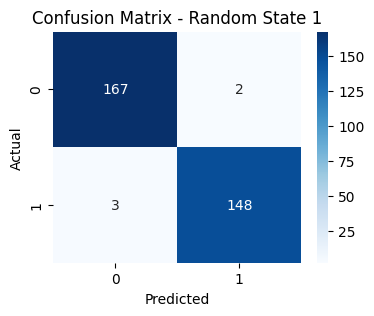

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data and preprocess as per your previous code

# Random State 1
review_train, review_test, label_train, label_test = train_test_split(df['pos'], df['deceptive'], test_size=0.2, random_state=1)
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
print("Random State 1:")
print("Accuracy:", metrics.accuracy_score(label_test, pred))
conf_matrix = confusion_matrix(label_test, pred)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(label_test, pred))

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random State 1')
plt.show()

Random State 10:
Accuracy: 0.971875
Confusion Matrix:
 [[155   5]
 [  4 156]]
              precision    recall  f1-score   support

   deceptive       0.97      0.97      0.97       160
    truthful       0.97      0.97      0.97       160

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320



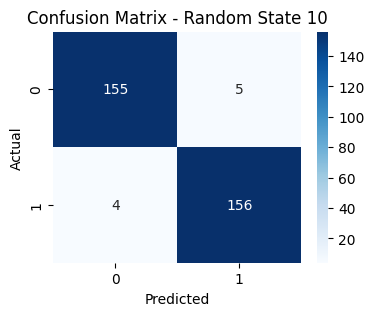

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data and preprocess as per your previous code

# Random State 1
review_train, review_test, label_train, label_test = train_test_split(df['pos'], df['deceptive'], test_size=0.2, random_state=10)
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
print("Random State 10:")
print("Accuracy:", metrics.accuracy_score(label_test, pred))
conf_matrix = confusion_matrix(label_test, pred)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(label_test, pred))

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random State 10')
plt.show()

Random State 20:
Accuracy: 0.95625
Confusion Matrix:
 [[152   9]
 [  5 154]]
              precision    recall  f1-score   support

   deceptive       0.97      0.94      0.96       161
    truthful       0.94      0.97      0.96       159

    accuracy                           0.96       320
   macro avg       0.96      0.96      0.96       320
weighted avg       0.96      0.96      0.96       320



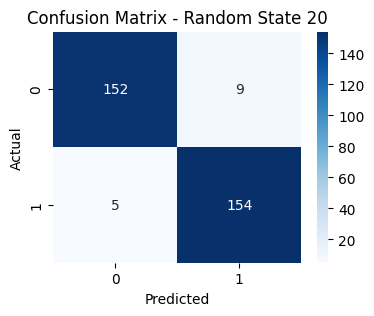

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data and preprocess as per your previous code

# Random State 1
review_train, review_test, label_train, label_test = train_test_split(df['pos'], df['deceptive'], test_size=0.2, random_state=20)
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
print("Random State 20:")
print("Accuracy:", metrics.accuracy_score(label_test, pred))
conf_matrix = confusion_matrix(label_test, pred)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(label_test, pred))

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random State 20')
plt.show()

Random State 42:
Accuracy: 0.978125
Confusion Matrix:
 [[149   3]
 [  4 164]]
              precision    recall  f1-score   support

   deceptive       0.97      0.98      0.98       152
    truthful       0.98      0.98      0.98       168

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



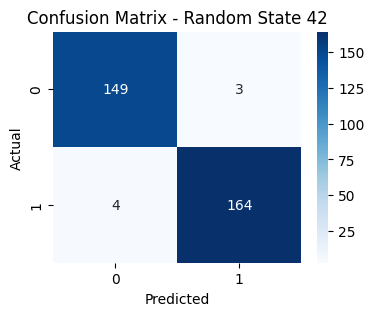

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data and preprocess as per your previous code

# Random State 1
review_train, review_test, label_train, label_test = train_test_split(df['pos'], df['deceptive'], test_size=0.2, random_state=42)
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
print("Random State 42:")
print("Accuracy:", metrics.accuracy_score(label_test, pred))
conf_matrix = confusion_matrix(label_test, pred)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(label_test, pred))

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random State 42')
plt.show()